# Hotel Booking Cancellations

Otkazivanje hotelskih rezervacija predstavlja ozbiljan poslovni i operativni problem za hotele.
Neočekivani otkazi dovode do gubitka prihoda, lošeg planiranja kapaciteta i neefikasnih strategija
overbooking-a.

Cilj ovog projekta je da se predvidi da li će rezervacija biti otkazana na osnovu dostupnih
informacija o rezervaciji, kao i da se identifikuju faktori koji najviše utiču na odluku o otkazivanju.
Ovakav model može pomoći hotelima u optimizaciji poslovnih odluka i smanjenju gubitaka.

Dataset je preuzet sa kaggle i koriscen je samo u svrhe kreiranja ovog projekta.

Dataset "hotel_bookings.csv" se sastoji iz 119391 reda i 32 kolone sa informacijama kao sto su:

**Kaggle dataset:
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand**





## Importi

In [54]:
# Funkcionalnosti za rad sa podacima
import numpy as np
import pandas as pd

# Vizuelizacija
import seaborn as sns
import matplotlib.pyplot as plt

# Modeliranje i preprocesiranje
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modeli
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metričke funkcije
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

## Učitavanje i osnovna analiza podataka

In [55]:
# Učitavanje podataka
data = pd.read_csv("hotel_bookings.csv")

# Brzi pogled na strukturu
print("Prvih 5 redova:")
display(data.head())

Prvih 5 redova:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [56]:
print("\nOsnovne informacije o kolonama:")
data.info()


Osnovne informacije o kolonama:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-nu

In [57]:
print("\nOsnovne statistike numeričkih kolona:")
data.describe()


Osnovne statistike numeričkih kolona:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


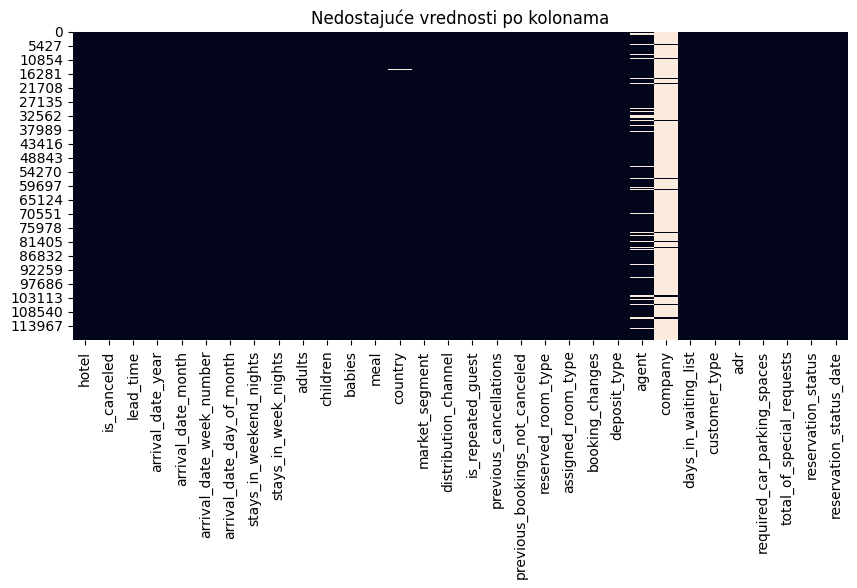

In [58]:
# Vizuelizacija nedostajućih vrednosti
plt.figure(figsize=(10,4))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Nedostajuće vrednosti po kolonama")
plt.show()

# Ovde uocavamo potencionalne kolone sa null vrednostima koje mozemo ukloniti - agent, company

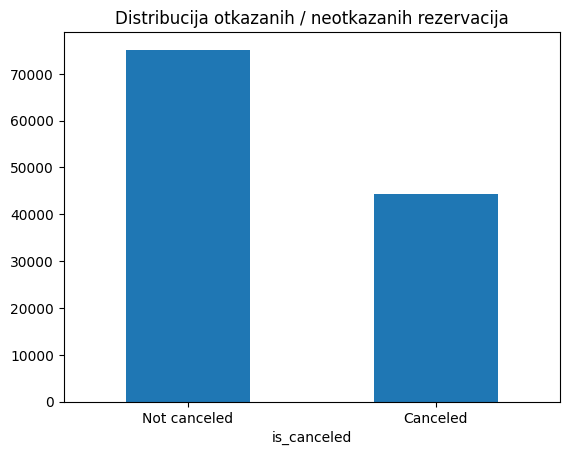

In [59]:
# Distribucija ciljne promenljive
data["is_canceled"].value_counts().plot(kind="bar")
plt.title("Distribucija otkazanih / neotkazanih rezervacija")
plt.xticks([0,1], ["Not canceled", "Canceled"], rotation=0)
plt.show()

# Ciljna promenljiva je nebalansirana (više neotkazanih nego otkazanih rezervacija), što je očekivano u realnim podacima i utiče na izbor metrika.

## Priprema podataka i preprocesiranje

- Uklanjamo kolone koje izazivaju data leakage (`reservation_status`, `reservation_status_date` - otkrivaju rezultat)
  i ID kolone (`company`, `agent`- null kolone).
- Delimo podatke na trenirajući i test skup.
- Definišemo posebne transformacije za numeričke i kategorijske promenljive
  (imputacija + skaliranje / one-hot enkodiranje).

In [60]:
# Uklanjanje kolona koje ne želimo u modelu (leakage + identifikatori)
data = data.drop(
    ["company", "agent", "reservation_status", "reservation_status_date",""],
    axis=1,
    errors="ignore"
)

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


In [61]:
# Ciljna i ulazne promenljive
y = data["is_canceled"] # Na cemu se uce podaci
X = data.drop(["is_canceled"], axis=1) # Podaci za ucenje

In [62]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,102,2017,August,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,34,2017,August,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,109,2017,August,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


# Data Split & Pipeline

In [63]:
# Zamenjujemo vrednosti zemalja koje se retko pojavljuju
country_counts = data["country"].value_counts()
rare_countries = country_counts[country_counts < 20].index

data["country"] = data["country"].replace(rare_countries, "Other")

# Podela na train i test (stratifikacija zadržava odnos klasa)
# Velika kolicina podataka omogucava nam da mozemo imati 70% train data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [64]:
# Razdvajanje numeričkih i kategorijskih kolona
num_cols = X_train.select_dtypes(include="number").columns
cat_cols = X_train.select_dtypes(exclude="number").columns

print("Numeričke kolone:", list(num_cols))
print("Kategorijske kolone:", list(cat_cols))

Numeričke kolone: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Kategorijske kolone: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


In [65]:
# Preprocesiranje za kategorijske kolone: imputacija + one-hot enkodiranje
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")
),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocesiranje za numeričke kolone: imputacija + standardizacija
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


# ColumnTransformer koji kombinuje obe grane
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [66]:
# Vizuelzacija pipelin-a
from sklearn import set_config
set_config(display='diagram')

log_reg_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cance...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object'))])),
                ('clf', LogisticRegression(max_iter=1000))])

In [73]:
rf_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cance...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object'))])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

## Bazni model – logistička regresija

Logistička regresija se koristi kao bazni model zbog svoje jednostavnosti i interpretabilnosti.
Ona omogućava osnovnu procenu da li je problem uopšte prediktivan.

In [67]:
# Kreiranje pipeline-a: prvo preprocesiranje, pa model
log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
])

# Treniranje baznog modela
log_reg_pipeline.fit(X_train, y_train)

# Predikcije na test skupu
y_pred_lr = log_reg_pipeline.predict(X_test)
y_prob_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Evaluacija
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8180193762738365
[[20477  2073]
 [ 4445  8822]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     22550
           1       0.81      0.66      0.73     13267

    accuracy                           0.82     35817
   macro avg       0.82      0.79      0.80     35817
weighted avg       0.82      0.82      0.81     35817



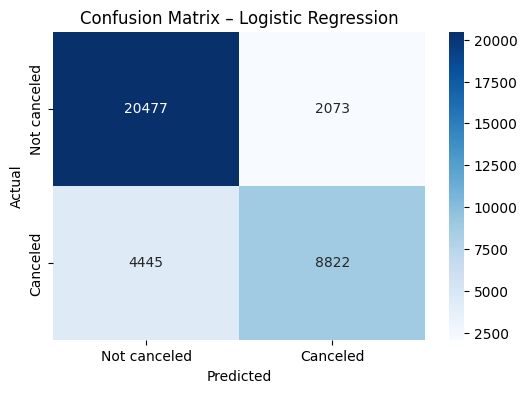

In [68]:
# Vizuelizacija konfuzione matrice
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not canceled", "Canceled"],
            yticklabels=["Not canceled", "Canceled"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

## Napredni model – Random Forest

Random Forest se koristi kao napredniji model kako bi se obuhvatile nelinearne veze
i interakcije između promenljivih koje linearni modeli ne mogu u potpunosti da uhvate.

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),   # isti preprocess
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced_subsample",
        n_jobs=-1,
        min_samples_leaf=2,
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.880587430549739
[[20618  1932]
 [ 2345 10922]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     22550
           1       0.85      0.82      0.84     13267

    accuracy                           0.88     35817
   macro avg       0.87      0.87      0.87     35817
weighted avg       0.88      0.88      0.88     35817



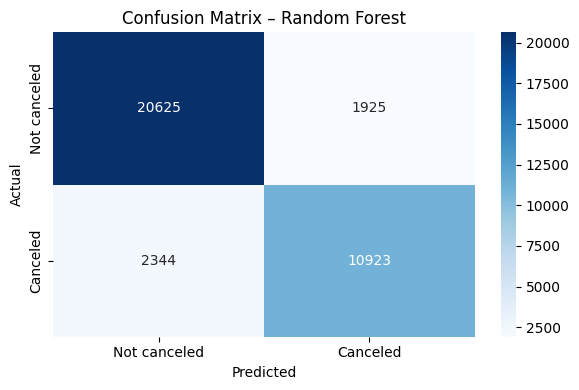

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Matrica konfuzije radi tumacenja rezultata
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Not canceled", "Canceled"],
    yticklabels=["Not canceled", "Canceled"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

# Logisticka regresija verovatnoca
y_prob_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("LR ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

# Random forest verovatnoca
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
print("RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


LR ROC-AUC: 0.896329107598551
RF ROC-AUC: 0.9501829623440919


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    "Precision (Canceled=1)": [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    "Recall (Canceled=1)": [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    "F1 (Canceled=1)": [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)]
})


results

,Model,Accuracy,Precision (Canceled=1),Recall (Canceled=1),F1 (Canceled=1)
0,Logistic Regression,0.818019,0.809729,0.664958,0.730238
1,Random Forest,0.880587,0.849697,0.823246,0.836262


## Zaključci i dalji koraci

Random Forest model pokazuje bolje performanse u odnosu na logističku regresiju,
posebno u pogledu recall metrike za otkazane rezervacije.

Model je pokazao visoku sansu uspesnog pogadjanja potencionalne rezervacije - sto indikuje manje limitiranu biznis primenu.

U ovom problemu recall je posebno važan, jer propušteno otkazivanje može dovesti
do gubitka prihoda i neefikasnog upravljanja kapacitetima.

Za sad prihvacena je preciznost od 0.8, tacnije recall od 0.82, nastavicu dalje istrazivanje nad modelom radi veceg postizanja preciznosti i najbitnije, recall-a.

Mogući dalji koraci uključuju:
- dodatno podešavanje hiperparametara i kros-validaciju
- vremensku validaciju kako bi se sprečilo curenje informacija
- korišćenje naprednih metoda interpretacije modela (npr. SHAP)

- istrazivanje potencionalnih modela sa vecim nivoom preciznosti i recall-om